In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style(style="whitegrid")
pd.set_option('display.max_columns',None)

In [3]:
data=pd.read_csv("mushroom.csv")
data

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color stalk_shape  \
0         descending      distant     broad       pink    tapering   
1            notched      crowded    narrow  chocolate   enlarging   
2         descending      crowded     broad     purple    tapering   
3            notched        close     broad     orange   enlarging   
4               free      crowded    narrow     orange   enlarging   
...              ...          ...       ...        ...         ...   
1995        attached      crowded    narrow  chocolate    tapering   
1996        attached      distant    narrow        red    tapering   
1997         notched        close    narrow       pink    tapering   
1998            free        close    narrow     orange   enlarging   
1999      descending        close    narrow     purple   enlarging   

       stalk_root stalk_surface_above_ring stalk_surface_below_ring  \
0             cup                   smooth                    silky   
1          rooted                    silky                    silky   
2             cup                    scaly                    silky   
3            club                   smooth                    scaly   
4         missing                  fibrous                    scaly   
...           ...                      ...                      ...   
1995      bulbous                    silky                    silky   
1996  rhizomorphs                  fibrous                  fibrous   
1997      missing                   smooth                    silky   
1998       rooted                    scaly                  fibrous   
1999         club                  fibrous                    scaly   

     stalk_color_above_ring stalk_color_below_ring  veil_type veil_color  \
0                      gray                 yellow    partial      brown   
1                  cinnamon                  brown  universal      brown   
2                    yellow                   gray  universal     yellow   
3                    yellow                   pink    partial     yellow   
4                      gray                  white  universal      white   
...                     ...                    ...        ...        ...   
1995                   pink                 orange    partial     orange   
1996                   pink                 orange    partial      white   
1997                  brown                    red    partial      brown   
1998                   gray                   pink  universal     yellow   
1999                   gray                  brown    partial      white   

     ring_number   ring_type spore_print_color population  habitat      class  \
0            two   sheathing         chocolate  clustered    waste  poisonous   
1            two   sheathing             brown   numerous    waste     edible   
2            two   sheathing            purple   abundant    waste  poisonous   
3            two    cobwebby             green  clustered  grasses  poisonous   
4           none        none            yellow  clustered    urban  poisonous   
...          ...         ...               ...        ...      ...        ...   
199

# Exploratory Data Analysis (EDA)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

From above we can see that there are 26 columns in our dataset in which majority of the columns are object type and only 3 are numeric

# Descriptive Statistics

In [5]:
data.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054

# Total No of Columns

In [6]:
len(data.columns)

26

# Duplicate Rows

In [7]:
duplicate_rows=data[data.duplicated(keep=False)]
duplicate_rows

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1993         618      flat     grooves     green     yes    musty   
1994         871      flat       scaly      pink      no    spicy   
1995         863    sunken       scaly     brown     yes     foul   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   

     gill_attachment gill_spacing gill_size gill_color stalk_shape stalk_root  \
0         descending      distant     broad       pink    tapering        cup   
1            notched      crowded    narrow  chocolate   enlarging     rooted   
2         descending      crowded     broad     purple    tapering        cup   
3            notched        close     broad     orange   enlarging       club   
4               free      crowded    narrow     orange   enlarging    missing   
...              ...          ...       ...        ...         ...        ...   
1993         notched      crowded     broad  chocolate   enlarging    bulbous   
1994        attached      distant    narrow        red   enlarging    bulbous   
1995        attached      crowded    narrow  chocolate    tapering    bulbous   
1997         notched        close    narrow       pink    tapering    missing   
1998            free        close    narrow     orange   enlarging     rooted   

     stalk_surface_above_ring stalk_surface_below_ring stalk_color_above_ring  \
0                      smooth                    silky                   gray   
1                       silky                    silky               cinnamon   
2                       scaly                    silky                 yellow   
3                      smooth                    scaly                 yellow   
4                     fibrous                    scaly                   gray   
...                       ...                      ...                    ...   
1993                    scaly                  fibrous                  white   
1994                    silky                   smooth                  brown   
1995                    silky                    silky                   pink   
1997                   smooth                    silky                  brown   
1998                    scaly                  fibrous                   gray   

     stalk_color_below_ring  veil_type veil_color ring_number   ring_type  \
0                    yellow    partial      brown         two   sheathing   
1                     brown  universal      brown         two   sheathing   
2                      gray  universal     yellow         two   sheathing   
3                      pink    partial     yellow         two    cobwebby   
4                     white  universal      white        none        none   
...                     ...        ...        ...         ...         ...   
1993                   buff  universal     yellow         one        zone   
1994                 yellow  universal      brown         two        zone   
1995                 orange    partial     orange         one     flaring   
1997                    red    partial      brown         two  evanescent   
1998                   pink  universal     yellow         one    cobwebby   

     spore_print_color population  habitat      class  stalk_height  \
0            chocolate  clustered    waste  poisonous     14.276173   
1                brown   numerous    waste     edible      3.952715   
2               purple   abundant    waste  poisonous      9.054265   
3                green

In [8]:
data.duplicated().sum()

1024

In [9]:
data=data.drop_duplicates()
data.reset_index(drop="index",inplace=True)
data

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0          1167    sunken       scaly     white      no    anise   
1          1037    sunken     fibrous       red      no    anise   
2           309      flat     grooves    purple     yes     foul   
3           282      bell       scaly      pink     yes    fishy   
4           820      flat      smooth    yellow     yes    musty   
..          ...       ...         ...       ...     ...      ...   
971         877   conical     grooves     brown      no     foul   
972         926      bell     grooves      pink     yes    anise   
973         289    sunken      smooth    purple     yes    anise   
974        1160    sunken       scaly    purple     yes    musty   
975        1073    convex       scaly    yellow     yes  pungent   

    gill_attachment gill_spacing gill_size gill_color stalk_shape  \
0        descending      distant     broad       pink    tapering   
1           notched      crowded    narrow  chocolate   enlarging   
2        descending      crowded     broad     purple    tapering   
3           notched        close     broad     orange   enlarging   
4              free      crowded    narrow     orange   enlarging   
..              ...          ...       ...        ...         ...   
971         notched      crowded     broad  chocolate    tapering   
972      descending      distant     broad      brown   enlarging   
973      descending      crowded    narrow       buff    tapering   
974        attached      distant    narrow        red    tapering   
975      descending        close    narrow     purple   enlarging   

      stalk_root stalk_surface_above_ring stalk_surface_below_ring  \
0            cup                   smooth                    silky   
1         rooted                    silky                    silky   
2            cup                    scaly                    silky   
3           club                   smooth                    scaly   
4        missing                  fibrous                    scaly   
..           ...                      ...                      ...   
971          cup                   smooth                    silky   
972      bulbous                    scaly                  fibrous   
973         club                    scaly                    silky   
974  rhizomorphs                  fibrous                  fibrous   
975         club                  fibrous                    scaly   

    stalk_color_above_ring stalk_color_below_ring  veil_type veil_color  \
0                     gray                 yellow    partial      brown   
1                 cinnamon                  brown  universal      brown   
2                   yellow                   gray  universal     yellow   
3                   yellow                   pink    partial     yellow   
4                     gray                  white  universal      white   
..                     ...                    ...        ...        ...   
971                    red                 yellow  universal      brown   
972                   pink                   pink    partial      brown   
973                  brown                    red  universal     orange   
974                   pink                 orange    partial      white   
975                   gray                  brown    partial      white   

    ring_number  ring_type spore_print_color population  habitat      class  \
0           two  sheathing         chocolate  clustered    waste  poisonous   
1           two  sheathing             brown   numerous    waste     edible   
2           two  sheathing            purple   abundant    waste  poisonous   
3           two   cobwebby             green  clustered  grasses  poisonous   
4          none       none            yellow  clustered    urban  poisonous   
..          ...        ...               ...        ...      ...        ...   
971        none      large             brown   numerous    paths

# Null values

In [10]:
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [11]:
data.isnull().sum().sum()

0

<Axes: >

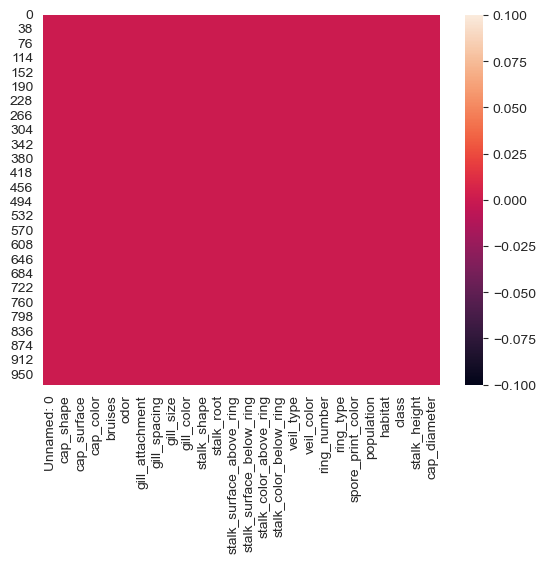

In [12]:
sns.heatmap(data.isnull())

# Unnamed: 0 Column

In [13]:
data["Unnamed: 0"].nunique()

976

In [14]:
data["Unnamed: 0"].value_counts()

Unnamed: 0
1167    1
43      1
803     1
856     1
14      1
       ..
107     1
74      1
595     1
57      1
1073    1
Name: count, Length: 976, dtype: int64

# Drop the Unnamed:0 column

In [15]:
data=data.drop("Unnamed: 0",axis=1)
data

cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0      sunken       scaly     white      no    anise      descending   
1      sunken     fibrous       red      no    anise         notched   
2        flat     grooves    purple     yes     foul      descending   
3        bell       scaly      pink     yes    fishy         notched   
4        flat      smooth    yellow     yes    musty            free   
..        ...         ...       ...     ...      ...             ...   
971   conical     grooves     brown      no     foul         notched   
972      bell     grooves      pink     yes    anise      descending   
973    sunken      smooth    purple     yes    anise      descending   
974    sunken       scaly    purple     yes    musty        attached   
975    convex       scaly    yellow     yes  pungent      descending   

    gill_spacing gill_size gill_color stalk_shape   stalk_root  \
0        distant     broad       pink    tapering          cup   
1        crowded    narrow  chocolate   enlarging       rooted   
2        crowded     broad     purple    tapering          cup   
3          close     broad     orange   enlarging         club   
4        crowded    narrow     orange   enlarging      missing   
..           ...       ...        ...         ...          ...   
971      crowded     broad  chocolate    tapering          cup   
972      distant     broad      brown   enlarging      bulbous   
973      crowded    narrow       buff    tapering         club   
974      distant    narrow        red    tapering  rhizomorphs   
975        close    narrow     purple   enlarging         club   

    stalk_surface_above_ring stalk_surface_below_ring stalk_color_above_ring  \
0                     smooth                    silky                   gray   
1                      silky                    silky               cinnamon   
2                      scaly                    silky                 yellow   
3                     smooth                    scaly                 yellow   
4                    fibrous                    scaly                   gray   
..                       ...                      ...                    ...   
971                   smooth                    silky                    red   
972                    scaly                  fibrous                   pink   
973                    scaly                    silky                  brown   
974                  fibrous                  fibrous                   pink   
975                  fibrous                    scaly                   gray   

    stalk_color_below_ring  veil_type veil_color ring_number  ring_type  \
0                   yellow    partial      brown         two  sheathing   
1                    brown  universal      brown         two  sheathing   
2                     gray  universal     yellow         two  sheathing   
3                     pink    partial     yellow         two   cobwebby   
4                    white  universal      white        none       none   
..                     ...        ...        ...         ...        ...   
971                 yellow  universal      brown        none      large   
972                   pink    partial      brown         two    pendant   
973                    red  universal     orange         two       none   
974                 orange    partial      white         one       zone   
975                  brown    partial      white         two      large   

    spore_print_color population  habitat      class  stalk_height  \
0           chocolate  clustered    waste  poisonous     14.276173   
1               brown   numerous    waste     edible      3.952715   
2              purple   abundant    waste  poisonous      9.054265   
3               green  clustered  grasses  poisonous      5.226499   
4              yellow  clustered    urban  poisonous     14.037532   
..                ...        ...      ...        ...           .

# Numerical Columns

In [16]:
numerical=data.select_dtypes("float64")
numerical

stalk_height  cap_diameter
0       14.276173      5.054983
1        3.952715     19.068319
2        9.054265      7.205884
3        5.226499     20.932692
4       14.037532     12.545245
..            ...           ...
971     13.020616      9.993008
972      3.751597     18.868135
973     13.134058     15.740028
974      6.500840     13.501957
975     13.066414     21.056642

[976 rows x 2 columns]

# No of numerical Columns

In [17]:
len(numerical.columns)

2

# categorical Columns

In [18]:
categorical=data.select_dtypes("object")
categorical

cap_shape cap_surface cap_color bruises     odor gill_attachment  \
0      sunken       scaly     white      no    anise      descending   
1      sunken     fibrous       red      no    anise         notched   
2        flat     grooves    purple     yes     foul      descending   
3        bell       scaly      pink     yes    fishy         notched   
4        flat      smooth    yellow     yes    musty            free   
..        ...         ...       ...     ...      ...             ...   
971   conical     grooves     brown      no     foul         notched   
972      bell     grooves      pink     yes    anise      descending   
973    sunken      smooth    purple     yes    anise      descending   
974    sunken       scaly    purple     yes    musty        attached   
975    convex       scaly    yellow     yes  pungent      descending   

    gill_spacing gill_size gill_color stalk_shape   stalk_root  \
0        distant     broad       pink    tapering          cup   
1        crowded    narrow  chocolate   enlarging       rooted   
2        crowded     broad     purple    tapering          cup   
3          close     broad     orange   enlarging         club   
4        crowded    narrow     orange   enlarging      missing   
..           ...       ...        ...         ...          ...   
971      crowded     broad  chocolate    tapering          cup   
972      distant     broad      brown   enlarging      bulbous   
973      crowded    narrow       buff    tapering         club   
974      distant    narrow        red    tapering  rhizomorphs   
975        close    narrow     purple   enlarging         club   

    stalk_surface_above_ring stalk_surface_below_ring stalk_color_above_ring  \
0                     smooth                    silky                   gray   
1                      silky                    silky               cinnamon   
2                      scaly                    silky                 yellow   
3                     smooth                    scaly                 yellow   
4                    fibrous                    scaly                   gray   
..                       ...                      ...                    ...   
971                   smooth                    silky                    red   
972                    scaly                  fibrous                   pink   
973                    scaly                    silky                  brown   
974                  fibrous                  fibrous                   pink   
975                  fibrous                    scaly                   gray   

    stalk_color_below_ring  veil_type veil_color ring_number  ring_type  \
0                   yellow    partial      brown         two  sheathing   
1                    brown  universal      brown         two  sheathing   
2                     gray  universal     yellow         two  sheathing   
3                     pink    partial     yellow         two   cobwebby   
4                    white  universal      white        none       none   
..                     ...        ...        ...         ...        ...   
971                 yellow  universal      brown        none      large   
972                   pink    partial      brown         two    pendant   
973                    red  universal     orange         two       none   
974                 orange    partial      white         one       zone   
975                  brown    partial      white         two      large   

    spore_print_color population  habitat      class  
0           chocolate  clustered    waste  poisonous  
1               brown   numerous    waste     edible  
2              purple   abundant    waste  poisonous  
3               green  clustered  grasses  poisonous  
4              yellow  clustered    urban  poisonous  
..                ...        ...      ...        ...  
971             brown   numerous    paths     edible  
972            yellow   numerous  grasses  p

# No of categorical Columns

In [19]:
len(categorical.columns)

23

# visualizations

In [20]:
data.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

cap_shape
sunken     216
flat       199
conical    193
bell       187
convex     181
Name: count, dtype: int64


<Axes: xlabel='cap_shape', ylabel='count'>

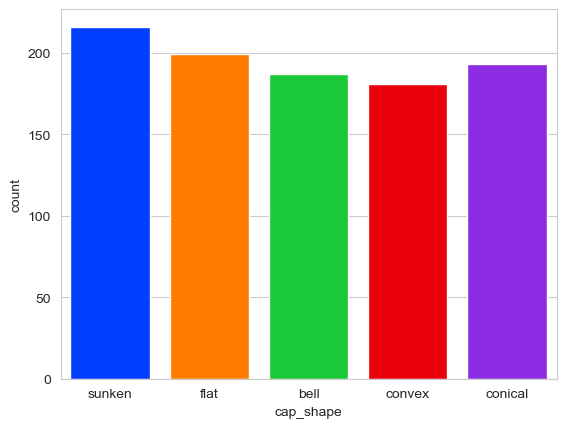

In [21]:
print(data['cap_shape'].value_counts())

sns.countplot(data=data,x='cap_shape',palette = 'bright',saturation=1)

cap_surface
scaly      292
smooth     238
fibrous    233
grooves    213
Name: count, dtype: int64


<Axes: xlabel='cap_surface', ylabel='count'>

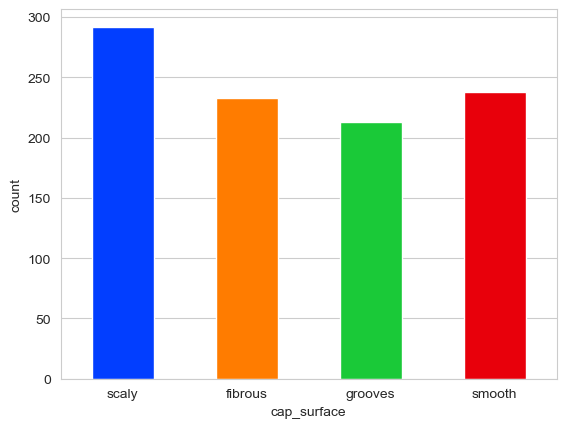

In [22]:
print(data['cap_surface'].value_counts())

sns.countplot(data=data,x='cap_surface',palette = 'bright',saturation=1,width=0.5)

cap_color
brown     127
yellow    114
pink      112
red       110
green     108
gray      105
buff      104
purple    100
white      96
Name: count, dtype: int64


<Axes: xlabel='cap_color', ylabel='count'>

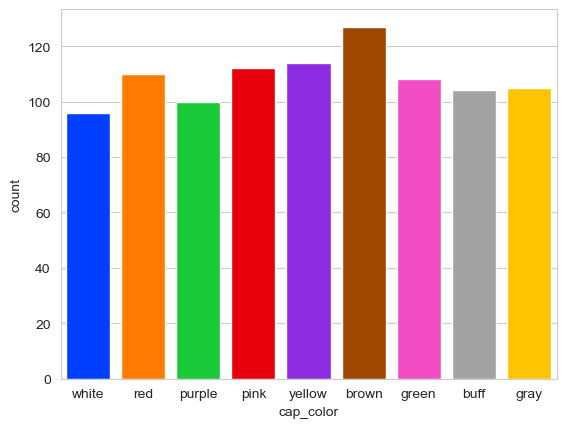

In [23]:
print(data['cap_color'].value_counts())

sns.countplot(data=data,x='cap_color',palette = 'bright',saturation=1)

bruises
yes    502
no     474
Name: count, dtype: int64


<Axes: xlabel='bruises', ylabel='count'>

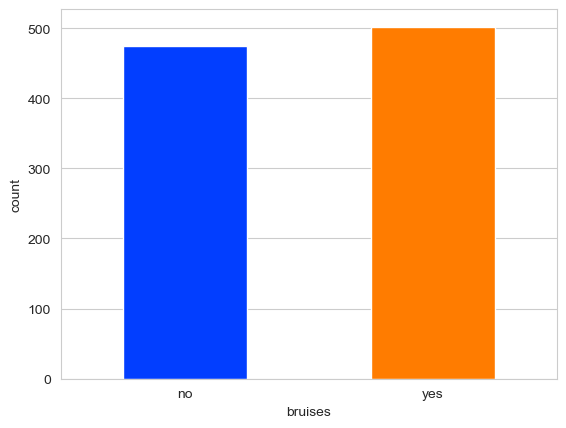

In [24]:
print(data['bruises'].value_counts())

sns.countplot(data=data,x='bruises',palette = 'bright',saturation=1,width=0.5)

odor
foul        126
anise       119
fishy       111
musty       111
spicy       110
creosote    107
pungent     101
almond       98
none         93
Name: count, dtype: int64


<Axes: xlabel='odor', ylabel='count'>

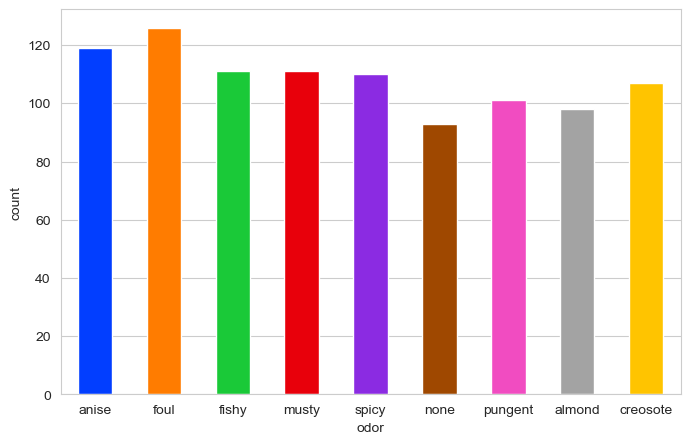

In [25]:
print(data['odor'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='odor',palette = 'bright',saturation=1,width=0.5)

gill_attachment
free          270
notched       248
attached      244
descending    214
Name: count, dtype: int64


<Axes: xlabel='gill_attachment', ylabel='count'>

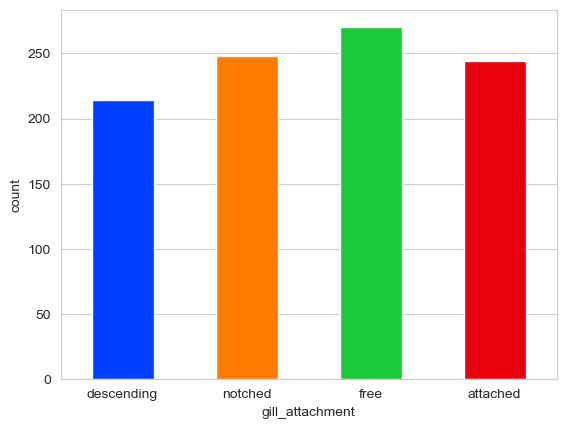

In [26]:
print(data['gill_attachment'].value_counts())

sns.countplot(data=data,x='gill_attachment',palette = 'bright',saturation=1,width=0.5)

gill_spacing
crowded    330
close      324
distant    322
Name: count, dtype: int64


<Axes: xlabel='gill_spacing', ylabel='count'>

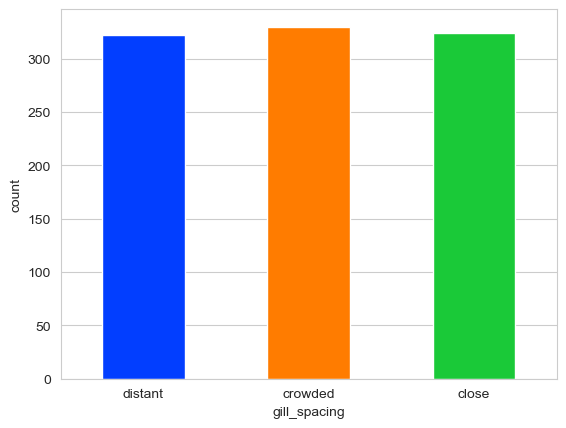

In [27]:
print(data['gill_spacing'].value_counts())

sns.countplot(data=data,x='gill_spacing',palette = 'bright',saturation=1,width=0.5)

gill_size
narrow    498
broad     478
Name: count, dtype: int64


<Axes: xlabel='gill_size', ylabel='count'>

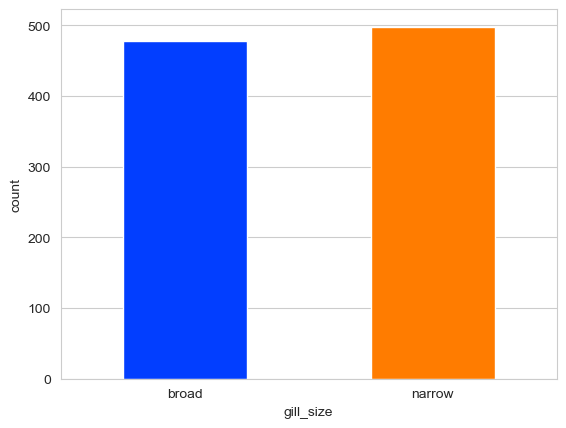

In [28]:
print(data['gill_size'].value_counts())

sns.countplot(data=data,x='gill_size',palette = 'bright',saturation=1,width=0.5)

gill_color
green        96
orange       95
purple       88
pink         84
black        84
white        82
brown        80
chocolate    79
buff         75
gray         75
yellow       72
red          66
Name: count, dtype: int64


<Axes: xlabel='gill_color', ylabel='count'>

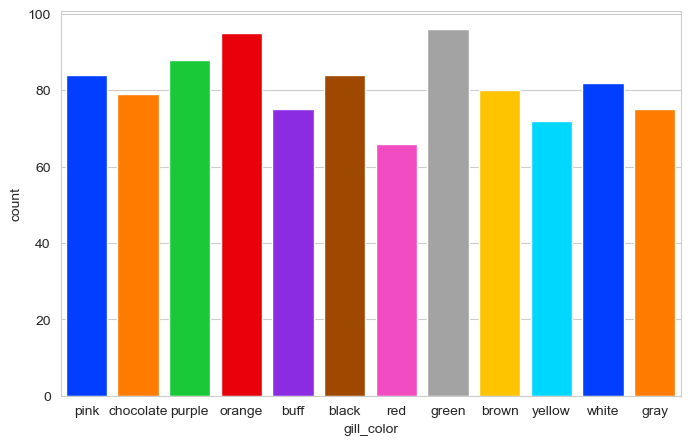

In [29]:
print(data['gill_color'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='gill_color',palette = 'bright',saturation=1)

stalk_shape
enlarging    524
tapering     452
Name: count, dtype: int64


<Axes: xlabel='stalk_shape', ylabel='count'>

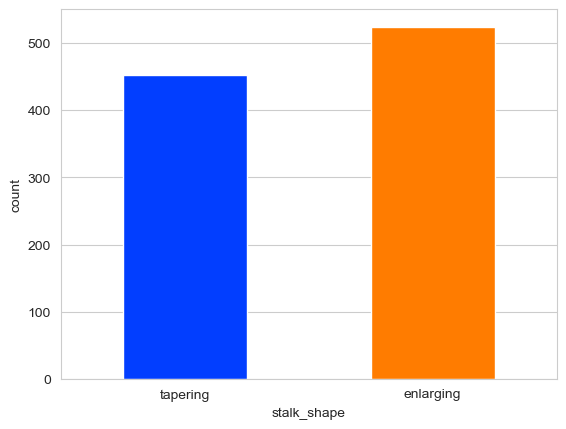

In [30]:
print(data['stalk_shape'].value_counts())

sns.countplot(data=data,x='stalk_shape',palette = 'bright',saturation=1,width=0.5)

stalk_root
bulbous        161
club           153
cup            152
missing        136
rooted         132
equal          121
rhizomorphs    121
Name: count, dtype: int64


<Axes: xlabel='stalk_root', ylabel='count'>

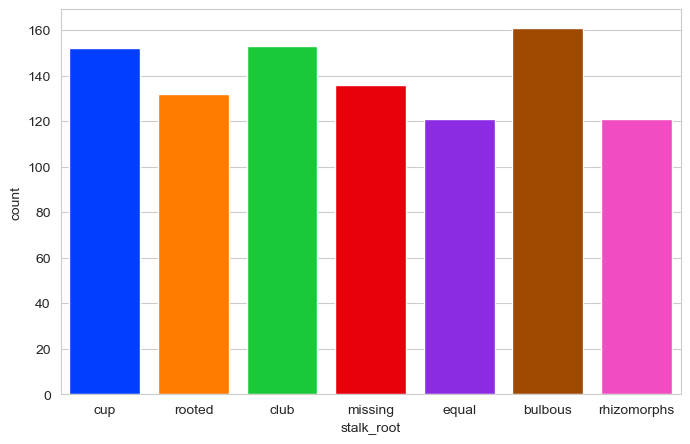

In [31]:
print(data['stalk_root'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='stalk_root',palette = 'bright',saturation=1)

gill_spacing
crowded    330
close      324
distant    322
Name: count, dtype: int64


<Axes: xlabel='gill_spacing', ylabel='count'>

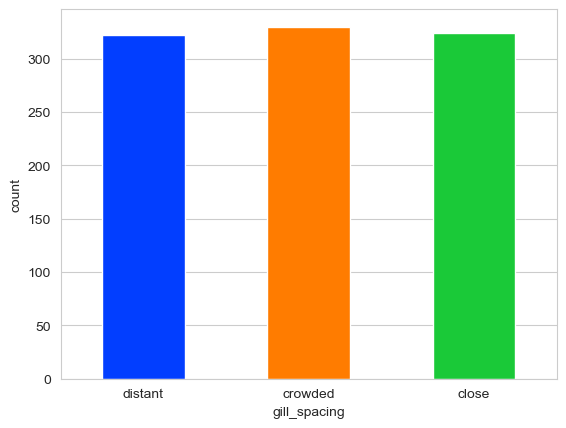

In [32]:
print(data['gill_spacing'].value_counts())

sns.countplot(data=data,x='gill_spacing',palette = 'bright',saturation=1,width=0.5)

stalk_surface_above_ring
fibrous    262
silky      254
scaly      232
smooth     228
Name: count, dtype: int64


<Axes: xlabel='stalk_surface_above_ring', ylabel='count'>

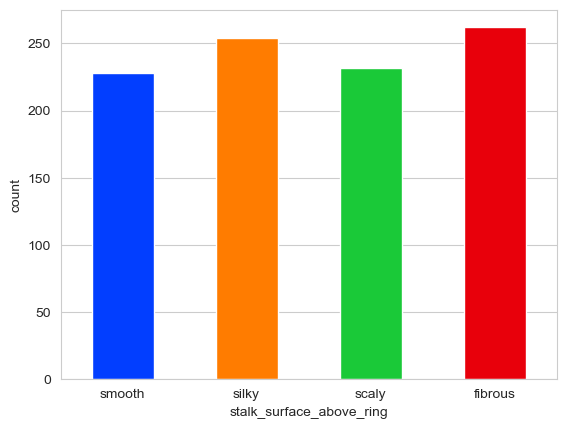

In [33]:
print(data['stalk_surface_above_ring'].value_counts())

sns.countplot(data=data,x='stalk_surface_above_ring',palette = 'bright',saturation=1,width=0.5)

stalk_surface_below_ring
silky      262
fibrous    243
scaly      236
smooth     235
Name: count, dtype: int64


<Axes: xlabel='stalk_surface_below_ring', ylabel='count'>

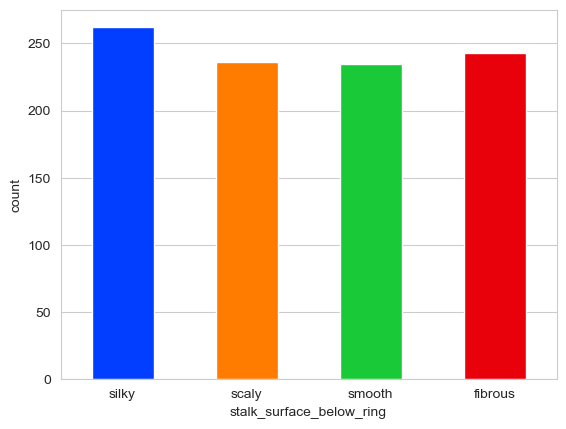

In [34]:
print(data['stalk_surface_below_ring'].value_counts())

sns.countplot(data=data,x='stalk_surface_below_ring',palette = 'bright',saturation=1,width=0.5)

stalk_color_above_ring
brown       127
orange      124
pink        116
cinnamon    109
gray        105
yellow      104
red         101
white       100
buff         90
Name: count, dtype: int64


<Axes: xlabel='stalk_color_above_ring', ylabel='count'>

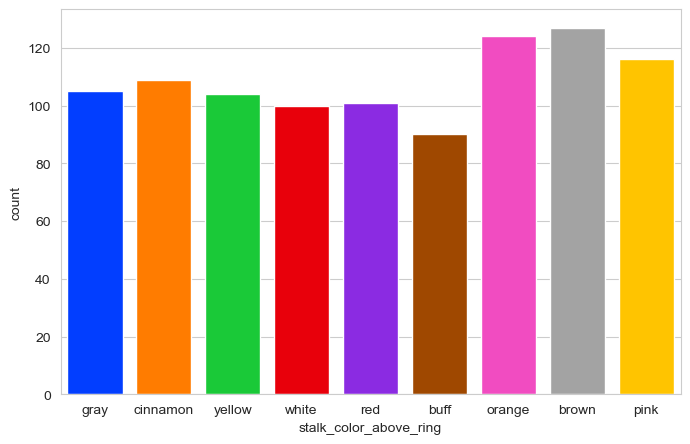

In [35]:
print(data['stalk_color_above_ring'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='stalk_color_above_ring',palette = 'bright',saturation=1)

stalk_color_below_ring
yellow      118
orange      118
pink        112
buff        112
brown       108
white       108
red         104
gray         98
cinnamon     98
Name: count, dtype: int64


<Axes: xlabel='stalk_color_below_ring', ylabel='count'>

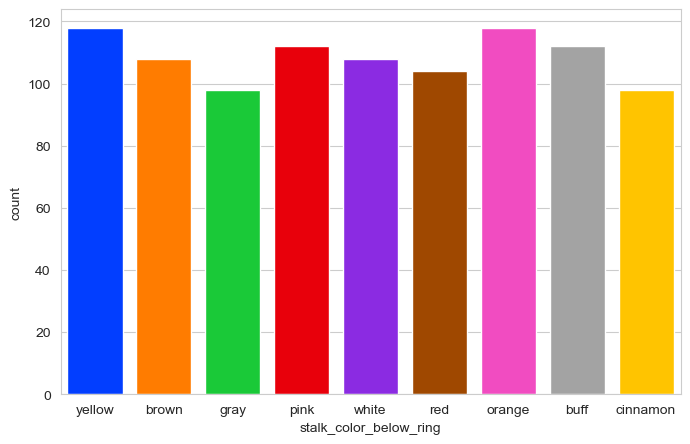

In [36]:
print(data['stalk_color_below_ring'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='stalk_color_below_ring',palette = 'bright',saturation=1)

veil_type
universal    500
partial      476
Name: count, dtype: int64


<Axes: xlabel='veil_type', ylabel='count'>

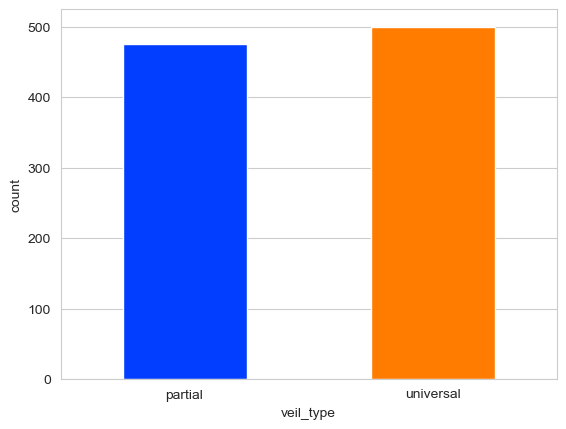

In [37]:
print(data['veil_type'].value_counts())

sns.countplot(data=data,x='veil_type',palette = 'bright',saturation=1,width=0.5)

veil_color
white     273
brown     257
yellow    227
orange    219
Name: count, dtype: int64


<Axes: xlabel='veil_color', ylabel='count'>

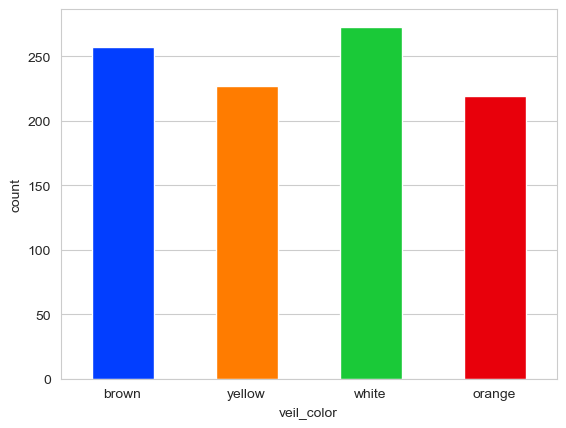

In [38]:
print(data['veil_color'].value_counts())

sns.countplot(data=data,x='veil_color',palette = 'bright',saturation=1,width=0.5)

ring_number
none    342
one     331
two     303
Name: count, dtype: int64


<Axes: xlabel='ring_number', ylabel='count'>

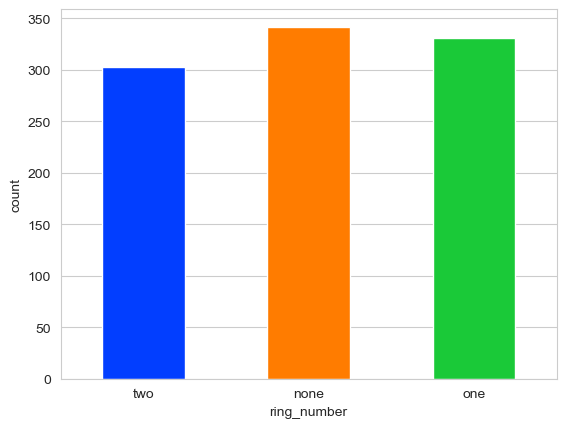

In [39]:
print(data['ring_number'].value_counts())

sns.countplot(data=data,x='ring_number',palette = 'bright',saturation=1,width=0.5)

ring_type
sheathing     135
pendant       129
zone          125
flaring       122
evanescent    119
large         118
cobwebby      115
none          113
Name: count, dtype: int64


<Axes: xlabel='ring_type', ylabel='count'>

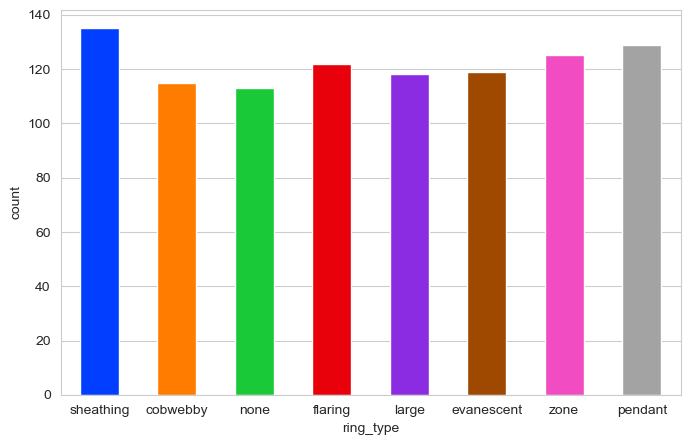

In [40]:
print(data['ring_type'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='ring_type',palette = 'bright',saturation=1,width=0.5)

spore_print_color
brown        122
green        120
yellow       118
black        115
purple       105
orange       102
white        101
chocolate     99
buff          94
Name: count, dtype: int64


<Axes: xlabel='spore_print_color', ylabel='count'>

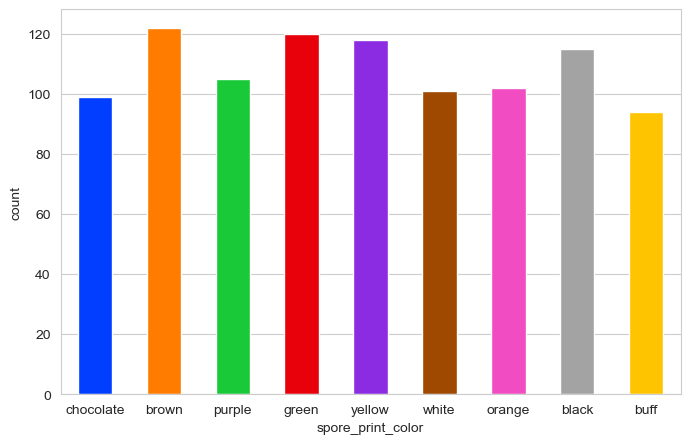

In [41]:
print(data['spore_print_color'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='spore_print_color',palette = 'bright',saturation=1,width=0.5)

population
abundant     176
clustered    166
numerous     163
scattered    160
several      158
solitary     153
Name: count, dtype: int64


<Axes: xlabel='population', ylabel='count'>

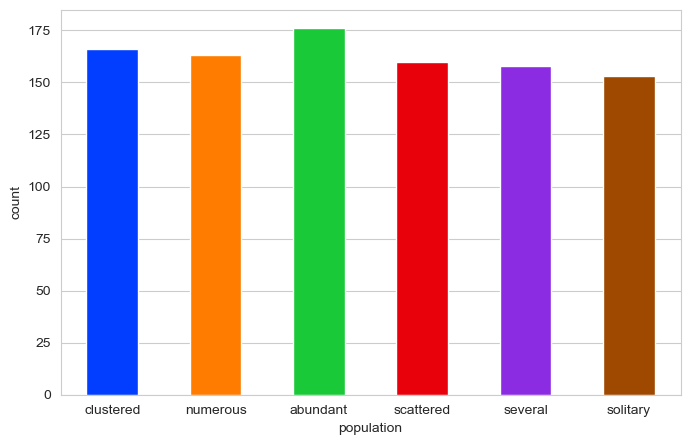

In [42]:
print(data['population'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='population',palette = 'bright',saturation=1,width=0.5)

habitat
urban      153
paths      151
meadows    145
waste      138
woods      136
leaves     131
grasses    122
Name: count, dtype: int64


<Axes: xlabel='habitat', ylabel='count'>

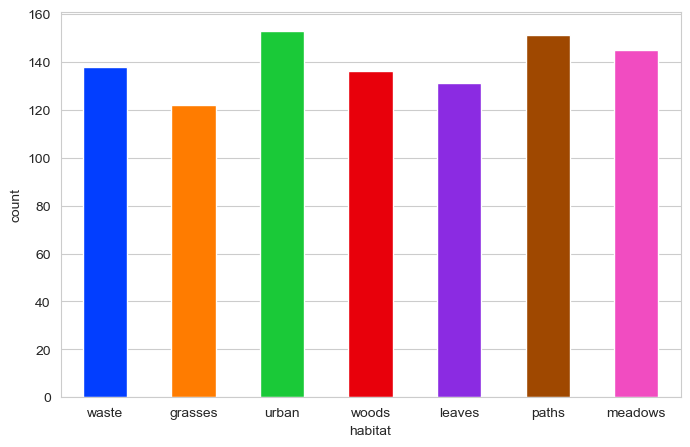

In [43]:
print(data['habitat'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(data=data,x='habitat',palette = 'bright',saturation=1,width=0.5)

class
poisonous    618
edible       358
Name: count, dtype: int64


<Axes: xlabel='class', ylabel='count'>

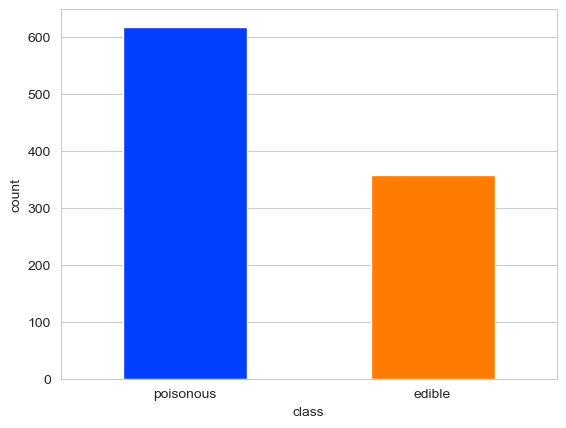

In [44]:
print(data['class'].value_counts())

sns.countplot(data=data,x='class',palette = 'bright',saturation=1,width=0.5)

C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

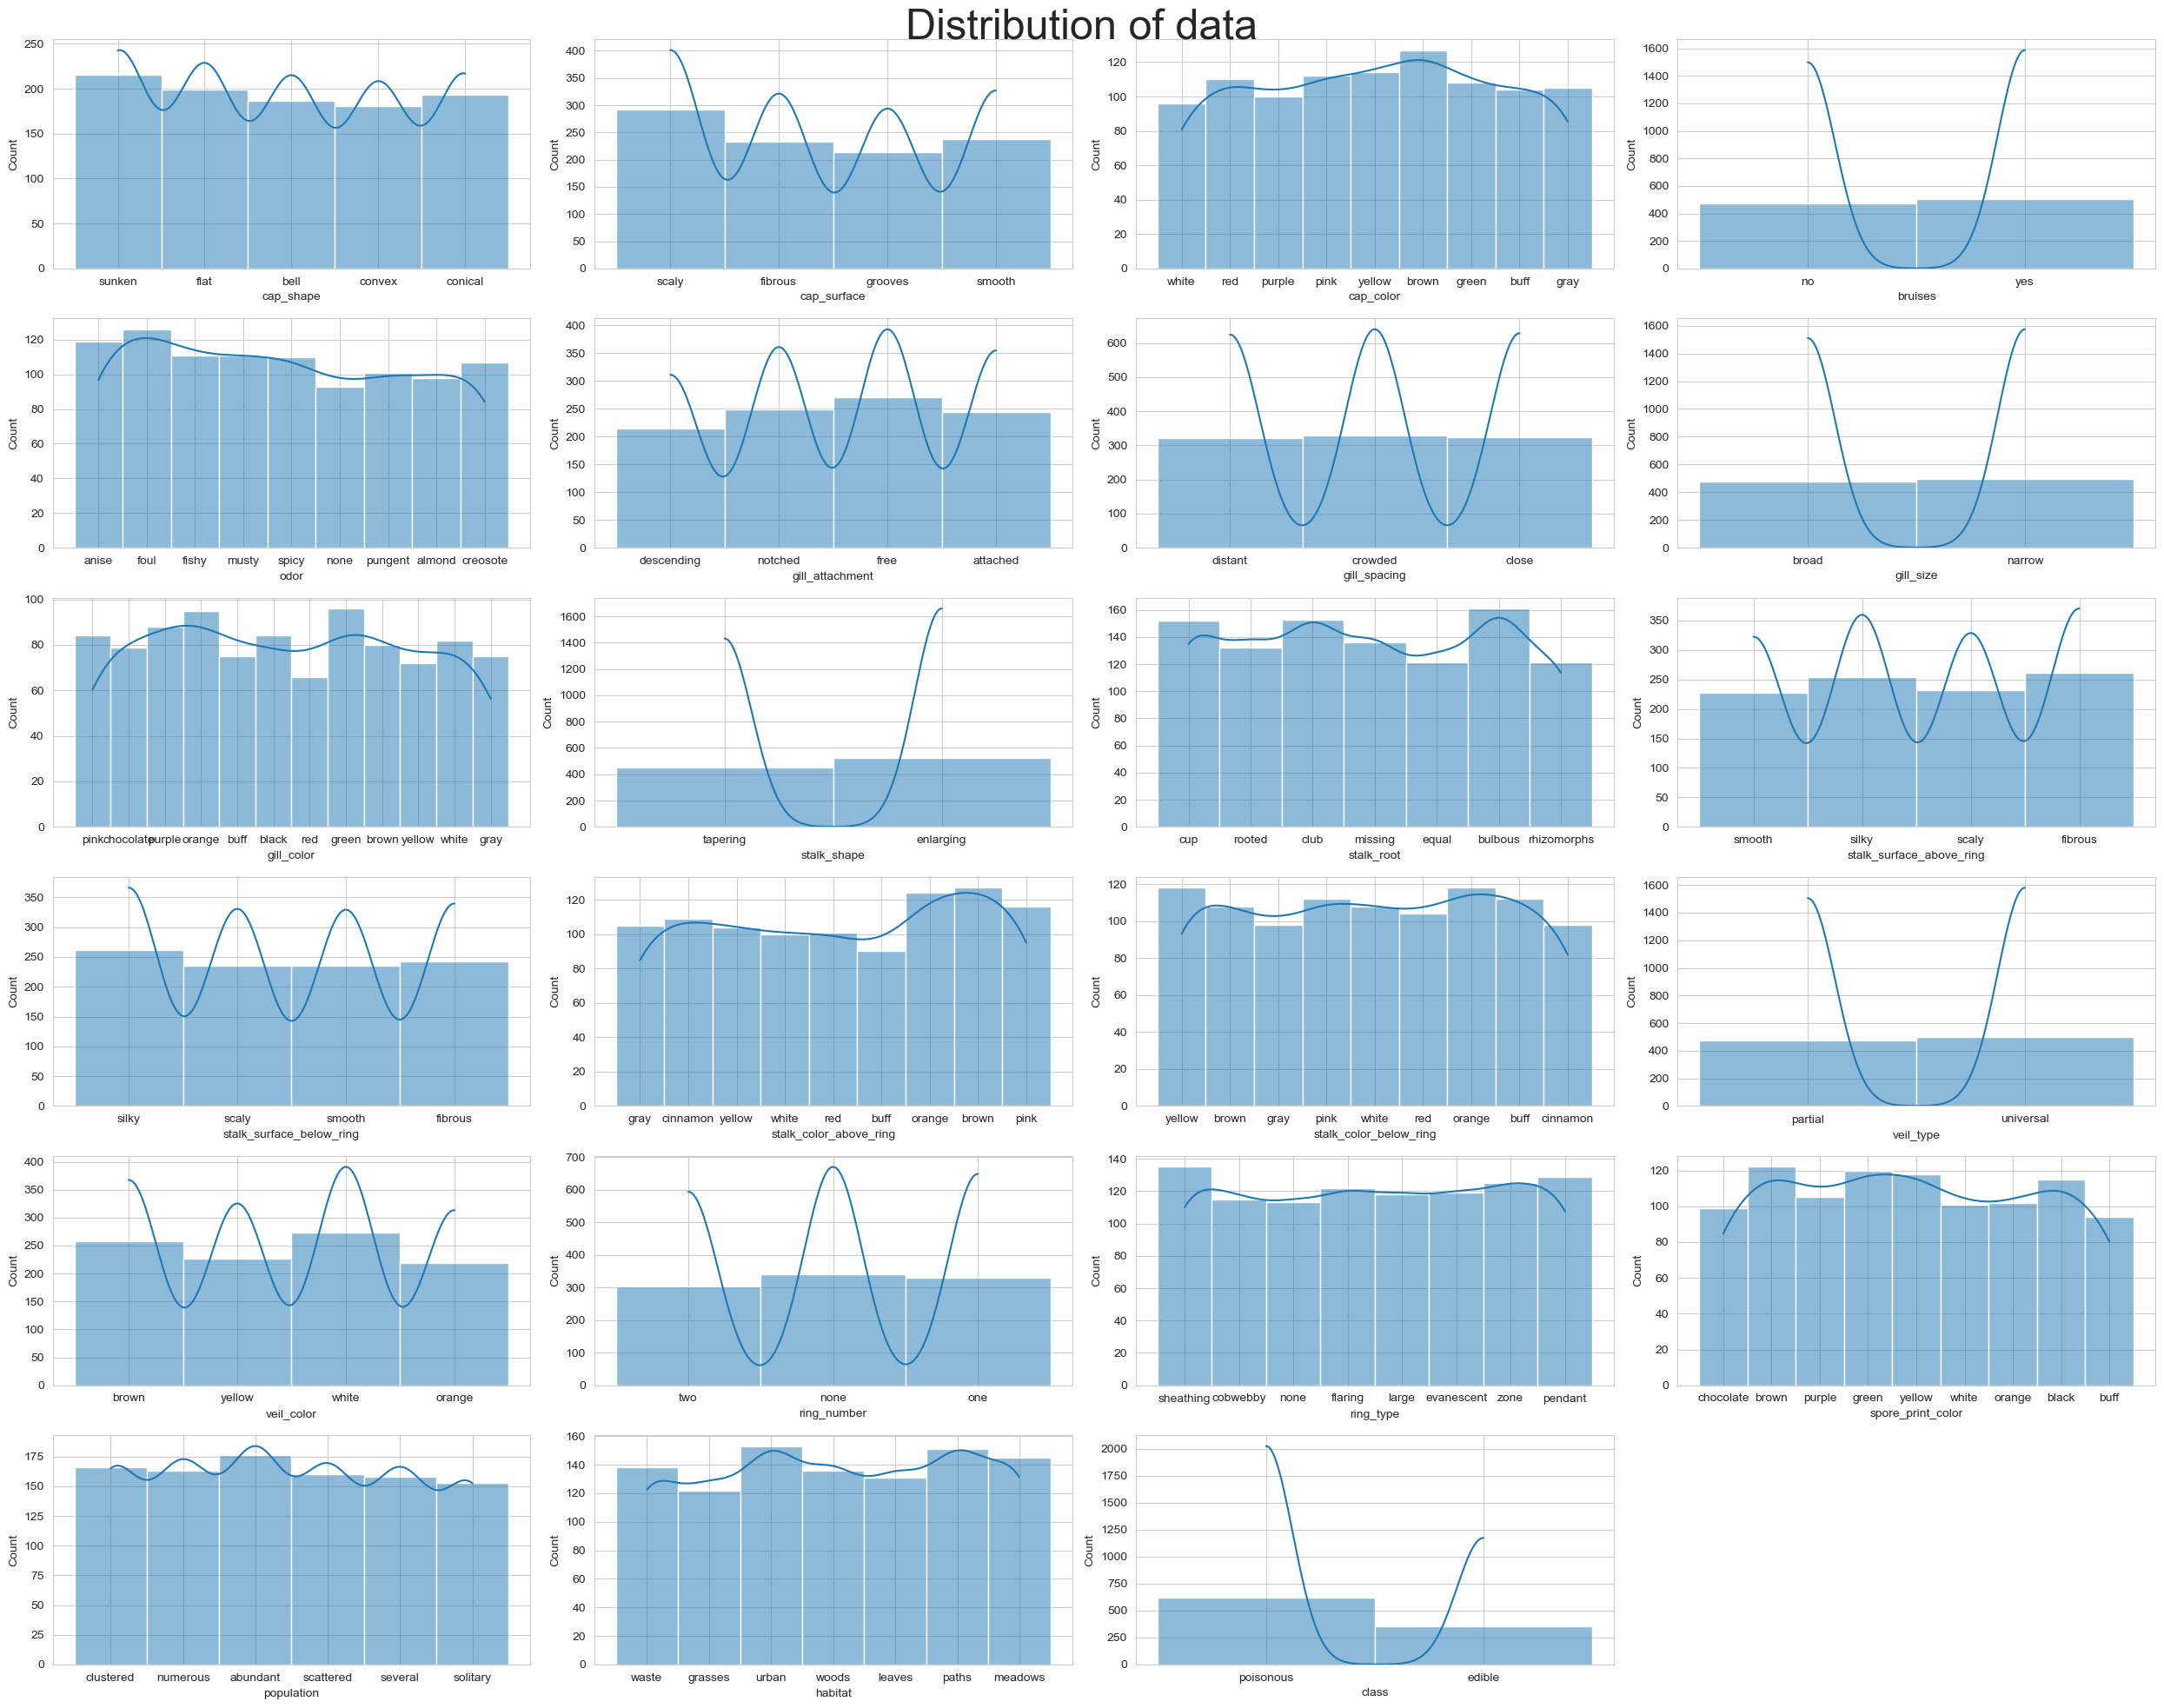

In [45]:
plt.figure(figsize=(25,20))

for i,column in enumerate(data.drop(columns = ['stalk_height','cap_diameter']).columns,1):
    plt.subplot(6,4,i)
    sns.histplot(data= data,x=column,kde=True)
    plt.suptitle("Distribution of data",size=35)
plt.tight_layout()
plt.show()

In [46]:
# Histograms for Numerical features

C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cap_diameter', ylabel='Count'>

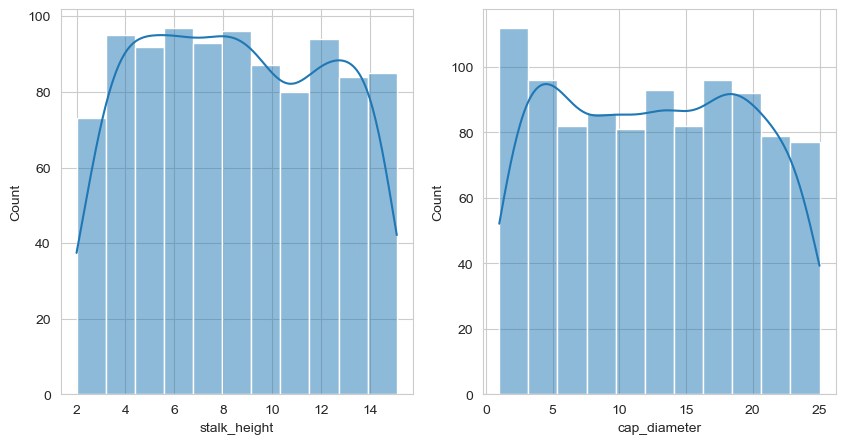

In [47]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(data,x='stalk_height',kde=True)

plt.subplot(1,2,2)
sns.histplot(data,x='cap_diameter',kde=True)

C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

<Axes: xlabel='class', ylabel='cap_diameter'>

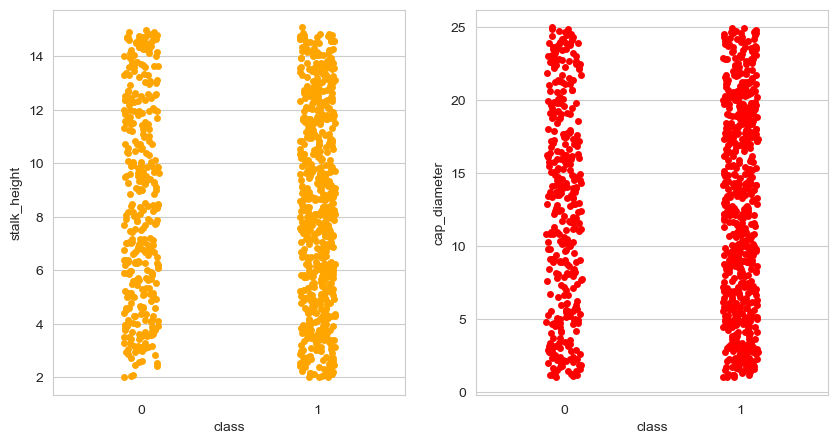

In [103]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.stripplot(data,x='class',y='stalk_height',color='orange')

plt.subplot(1,2,2)
sns.stripplot(data,x='class',y='cap_diameter',color="red")

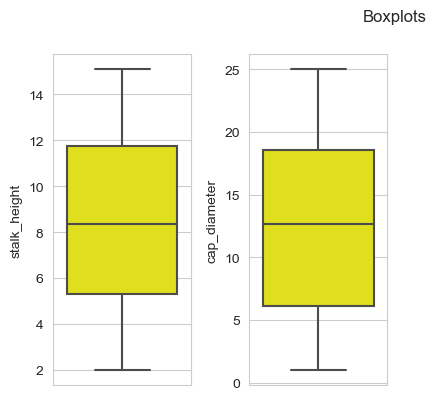

In [49]:
plt.figure(figsize=(8,25))
for i,column in enumerate(numerical.columns,1):
    plt.subplot(7,4,i)
    sns.boxplot(data= data,y=column,color="yellow")
    plt.suptitle("Boxplots",y=1,ha="center",va="top")
plt.tight_layout()
plt.show()

# Data Preprocessing

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

# Encode all the Categorical features

In [51]:
for column in categorical.columns:
    data[column]=encoder.fit_transform(data[column])

In [52]:
data

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0            4            2          7        0     1                1   
1            4            0          6        0     1                3   
2            3            1          5        1     4                1   
3            0            2          4        1     3                3   
4            3            3          8        1     5                2   
..         ...          ...        ...      ...   ...              ...   
971          1            1          0        0     4                3   
972          0            1          4        1     1                1   
973          4            3          5        1     1                1   
974          4            2          5        1     5                0   
975          2            2          8        1     7                1   

     gill_spacing  gill_size  gill_color  stalk_shape  stalk_root  \
0               2          0           7            1           2   
1               1          1           3            0           6   
2               1          0           8            1           2   
3               0          0           6            0           1   
4               1          1           6            0           4   
..            ...        ...         ...          ...         ...   
971             1          0           3            1           2   
972             2          0           1            0           0   
973             1          1           2            1           1   
974             2          1           9            1           5   
975             0          1           8            0           1   

     stalk_surface_above_ring  stalk_surface_below_ring  \
0                           3                         2   
1                           2                         2   
2                           1                         2   
3                           3                         1   
4                           0                         1   
..                        ...                       ...   
971                         3                         2   
972                         1                         0   
973                         1                         2   
974                         0                         0   
975                         0                         1   

     stalk_color_above_ring  stalk_color_below_ring  veil_type  veil_color  \
0                         3                       8          0           0   
1                         2                       0          1           0   
2                         8                       3          1           3   
3                         8                       5          0           3   
4                         3                       7          1           2   
..                      ...                     ...        ...         ...   
971                       6                       8          1           0   
972                       5                       5          0           0   
973                       0                       6          1           1   
974                       5                       4          0           2   
975                       3                       0          0           2   

     ring_number  ring_type  spore_print_color  population  habitat  class  \
0              2          6                  3           1        5      1   
1              2          6                  1           2        5      0   
2              2          6                  6           0        5      1   
3              2          0                  4           1        0      1   
4              0          4                  8           1        4      1   
..           ...        ...                ...         ...      ...    ...   
971            0          3                  1           2        3      0   
972            2 

# here class column
# 1 - indicates Poisonous
# 2 - indicates edible

In [53]:
correlation_matrix=data.corr()
correlation_matrix

cap_shape  cap_surface  cap_color   bruises  \
cap_shape                  1.000000     0.024645   0.020694 -0.007043   
cap_surface                0.024645     1.000000   0.010129 -0.013355   
cap_color                  0.020694     0.010129   1.000000  0.007862   
bruises                   -0.007043    -0.013355   0.007862  1.000000   
odor                      -0.035072    -0.001229  -0.056524  0.051111   
gill_attachment            0.017091    -0.008412   0.000201  0.006422   
gill_spacing              -0.026279     0.033273   0.001367 -0.017566   
gill_size                  0.017675    -0.046493   0.034965 -0.004689   
gill_color                 0.050239     0.033423   0.005884 -0.033166   
stalk_shape               -0.013837    -0.012625  -0.015452  0.035013   
stalk_root                 0.052715    -0.021370   0.006823 -0.000106   
stalk_surface_above_ring  -0.048211     0.034439  -0.038396 -0.041081   
stalk_surface_below_ring   0.006413    -0.011787   0.004605 -0.002800   
stalk_color_above_ring    -0.038000    -0.051801  -0.003503  0.013911   
stalk_color_below_ring    -0.018025    -0.003789  -0.007788 -0.088043   
veil_type                 -0.015447    -0.042954  -0.008664  0.007497   
veil_color                -0.004381     0.027026  -0.027817 -0.023444   
ring_number                0.038398     0.005017   0.037536 -0.037722   
ring_type                  0.012335     0.002838   0.023527 -0.067596   
spore_print_color          0.008641    -0.057301   0.045805 -0.028591   
population                 0.009890    -0.026943  -0.039548  0.014990   
habitat                   -0.003017    -0.038786  -0.006857  0.011681   
class                      0.008132    -0.047799  -0.048735 -0.007932   
stalk_height              -0.019087     0.026016   0.026948  0.067729   
cap_diameter               0.015284     0.030579   0.006289 -0.049061   

                              odor  gill_attachment  gill_spacing  gill_size  \
cap_shape                -0.035072         0.017091     -0.026279   0.017675   
cap_surface              -0.001229        -0.008412      0.033273  -0.046493   
cap_color                -0.056524         0.000201      0.001367   0.034965   
bruises                   0.051111         0.006422     -0.017566  -0.004689   
odor                      1.000000        -0.013212     -0.030698  -0.057671   
gill_attachment          -0.013212         1.000000     -0.024634  -0.011606   
gill_spacing             -0.030698        -0.024634      1.000000   0.012648   
gill_size                -0.057671        -0.011606      0.012648   1.000000   
gill_color               -0.030782         0.026293     -0.004135  -0.022993   
stalk_shape              -0.003433        -0.021527      0.060430  -0.035478   
stalk_root               -0.001555        -0.018382     -0.003949   0.040750   
stalk_surface_above_ring  0.048396        -0.000495     -0.019223  -0.015733   
stalk_surface_below_ring -0.025388        -0.011155     -0.038614   0.032329   
stalk_color_above_ring    0.003075        -0.015330     -0.001535  -0.038881   
stalk_color_below_ring    0.014668         0.026026     -0.002366  -0.026424   
veil_type                 0.022875        -0.044643     -0.027653  -0.041509   
veil_color                0.033718        -0.005227     -0.003433  -0.005179   
ring_number              -0.031397         0.048239      0.009182  -0.022972   
ring_type                 0.005064        -0.049124      0.008323   0.005937   
spore_print_color        -0.078276        -0.020564      0.023472   0.033767   
population               -0.000816         0.003722      0.005042   0.002667   
habitat                  -0.021675        -0.020783      0.024691   0.014063   
class                     0.009625        -0.023758      0.045121   0.019853   
stalk_height             -0.002972        -0.002778      0.006502  -0.017483   
cap_diameter             -0.043273        -0.012882      0.034553  -0.029404   

                          gill_color  stalk_sh

<Axes: >

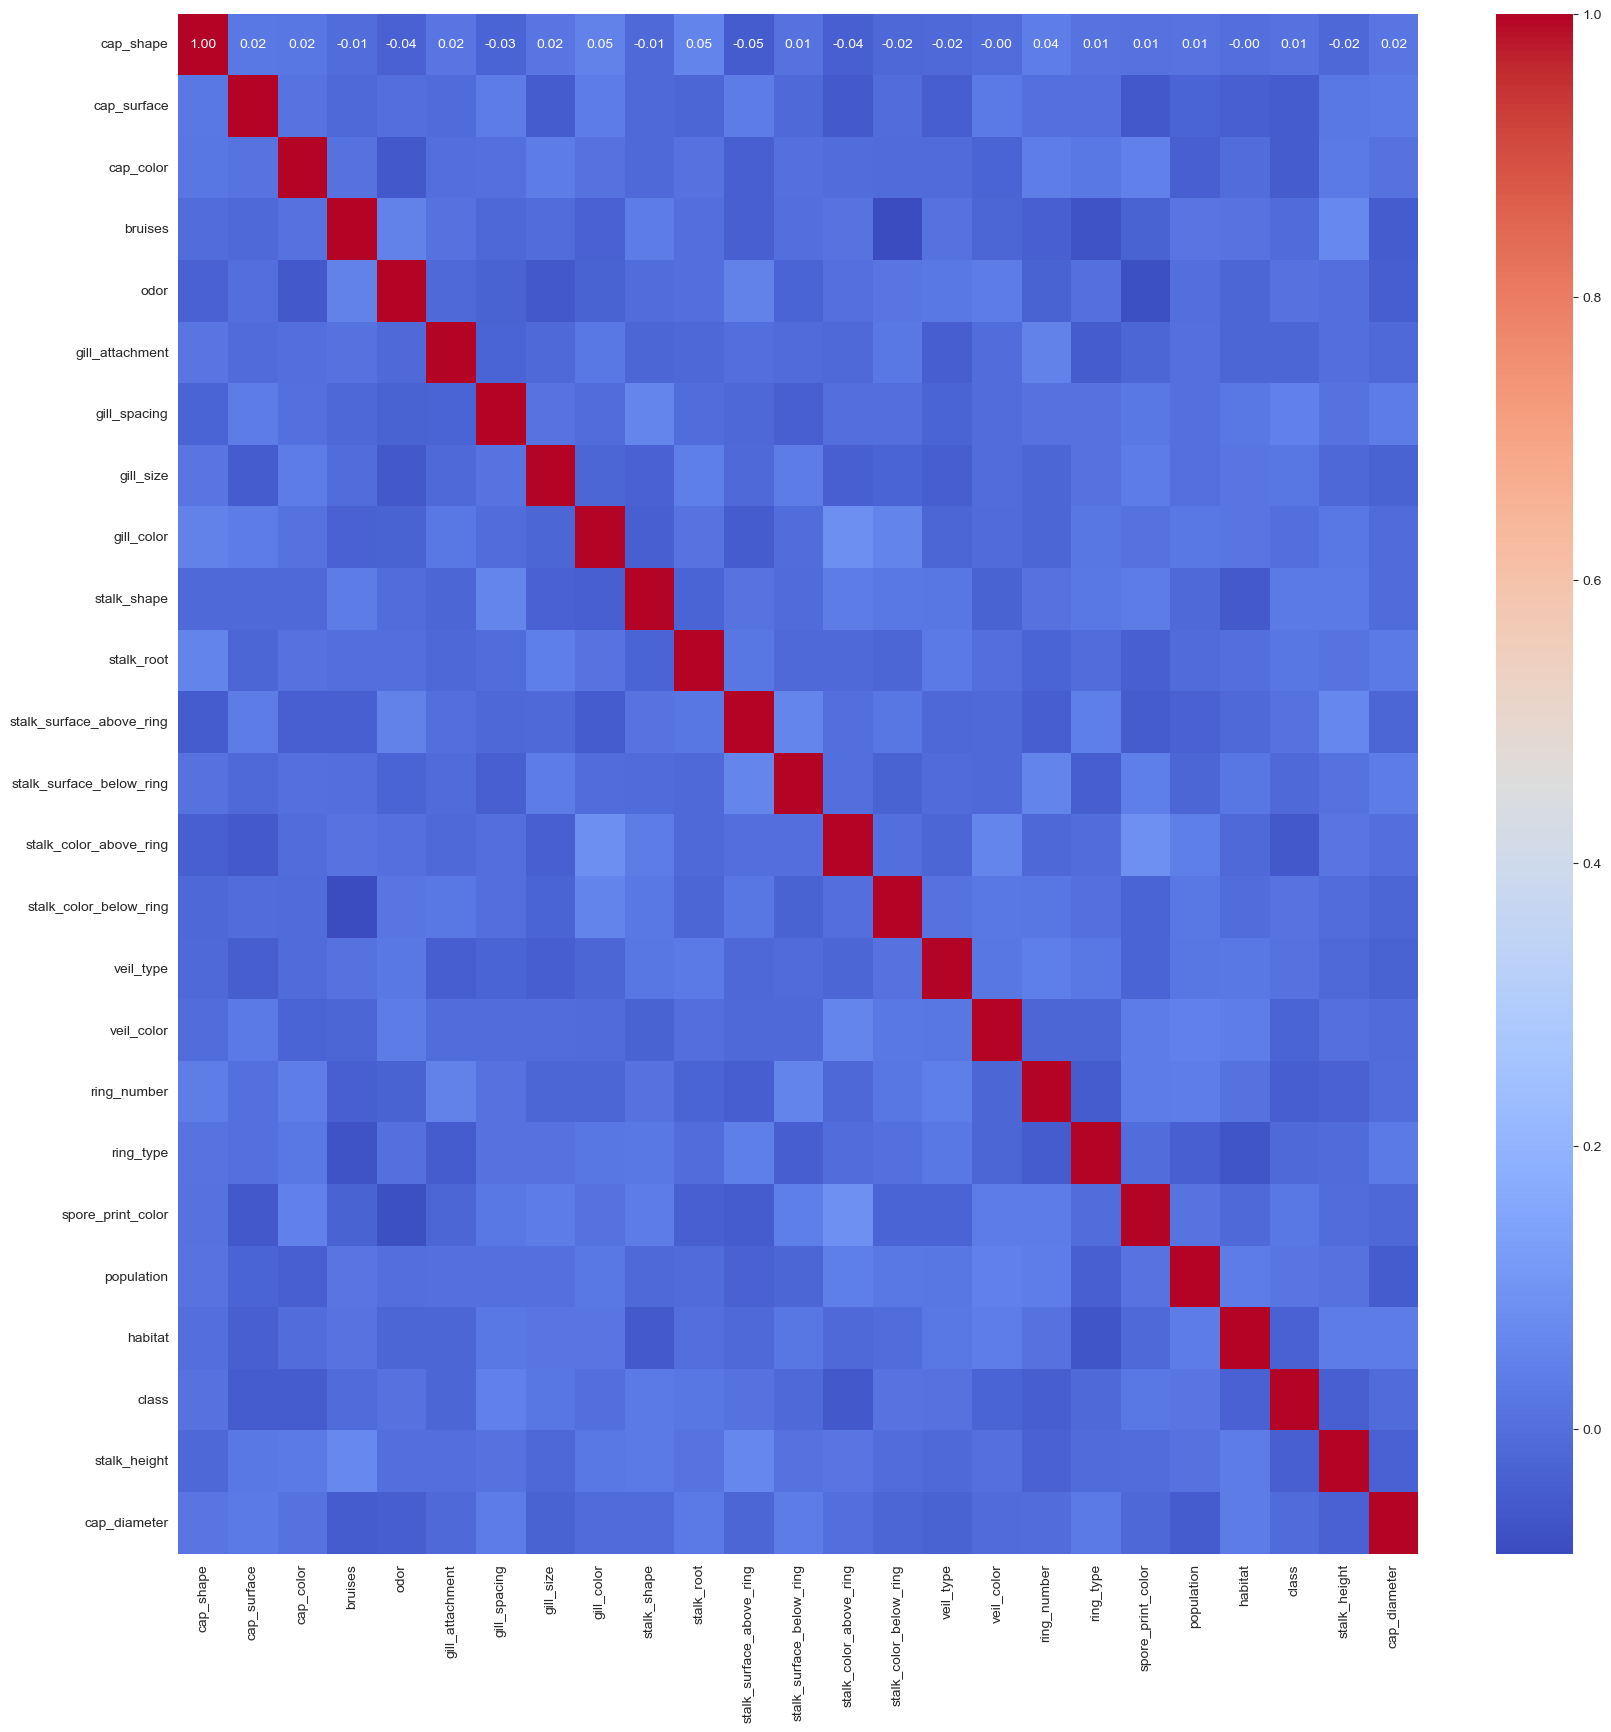

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm")

In [55]:
# Scatter Plot

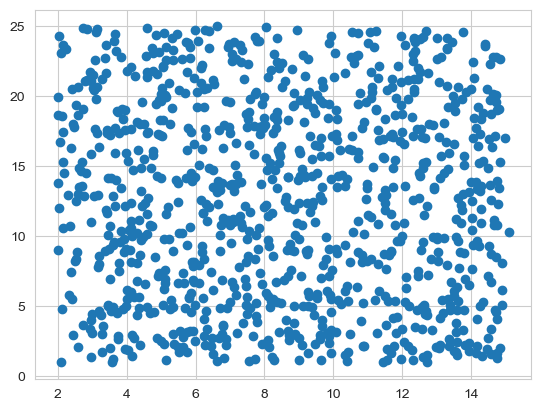

In [56]:
plt.scatter(data['stalk_height'],data['cap_diameter'])

C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

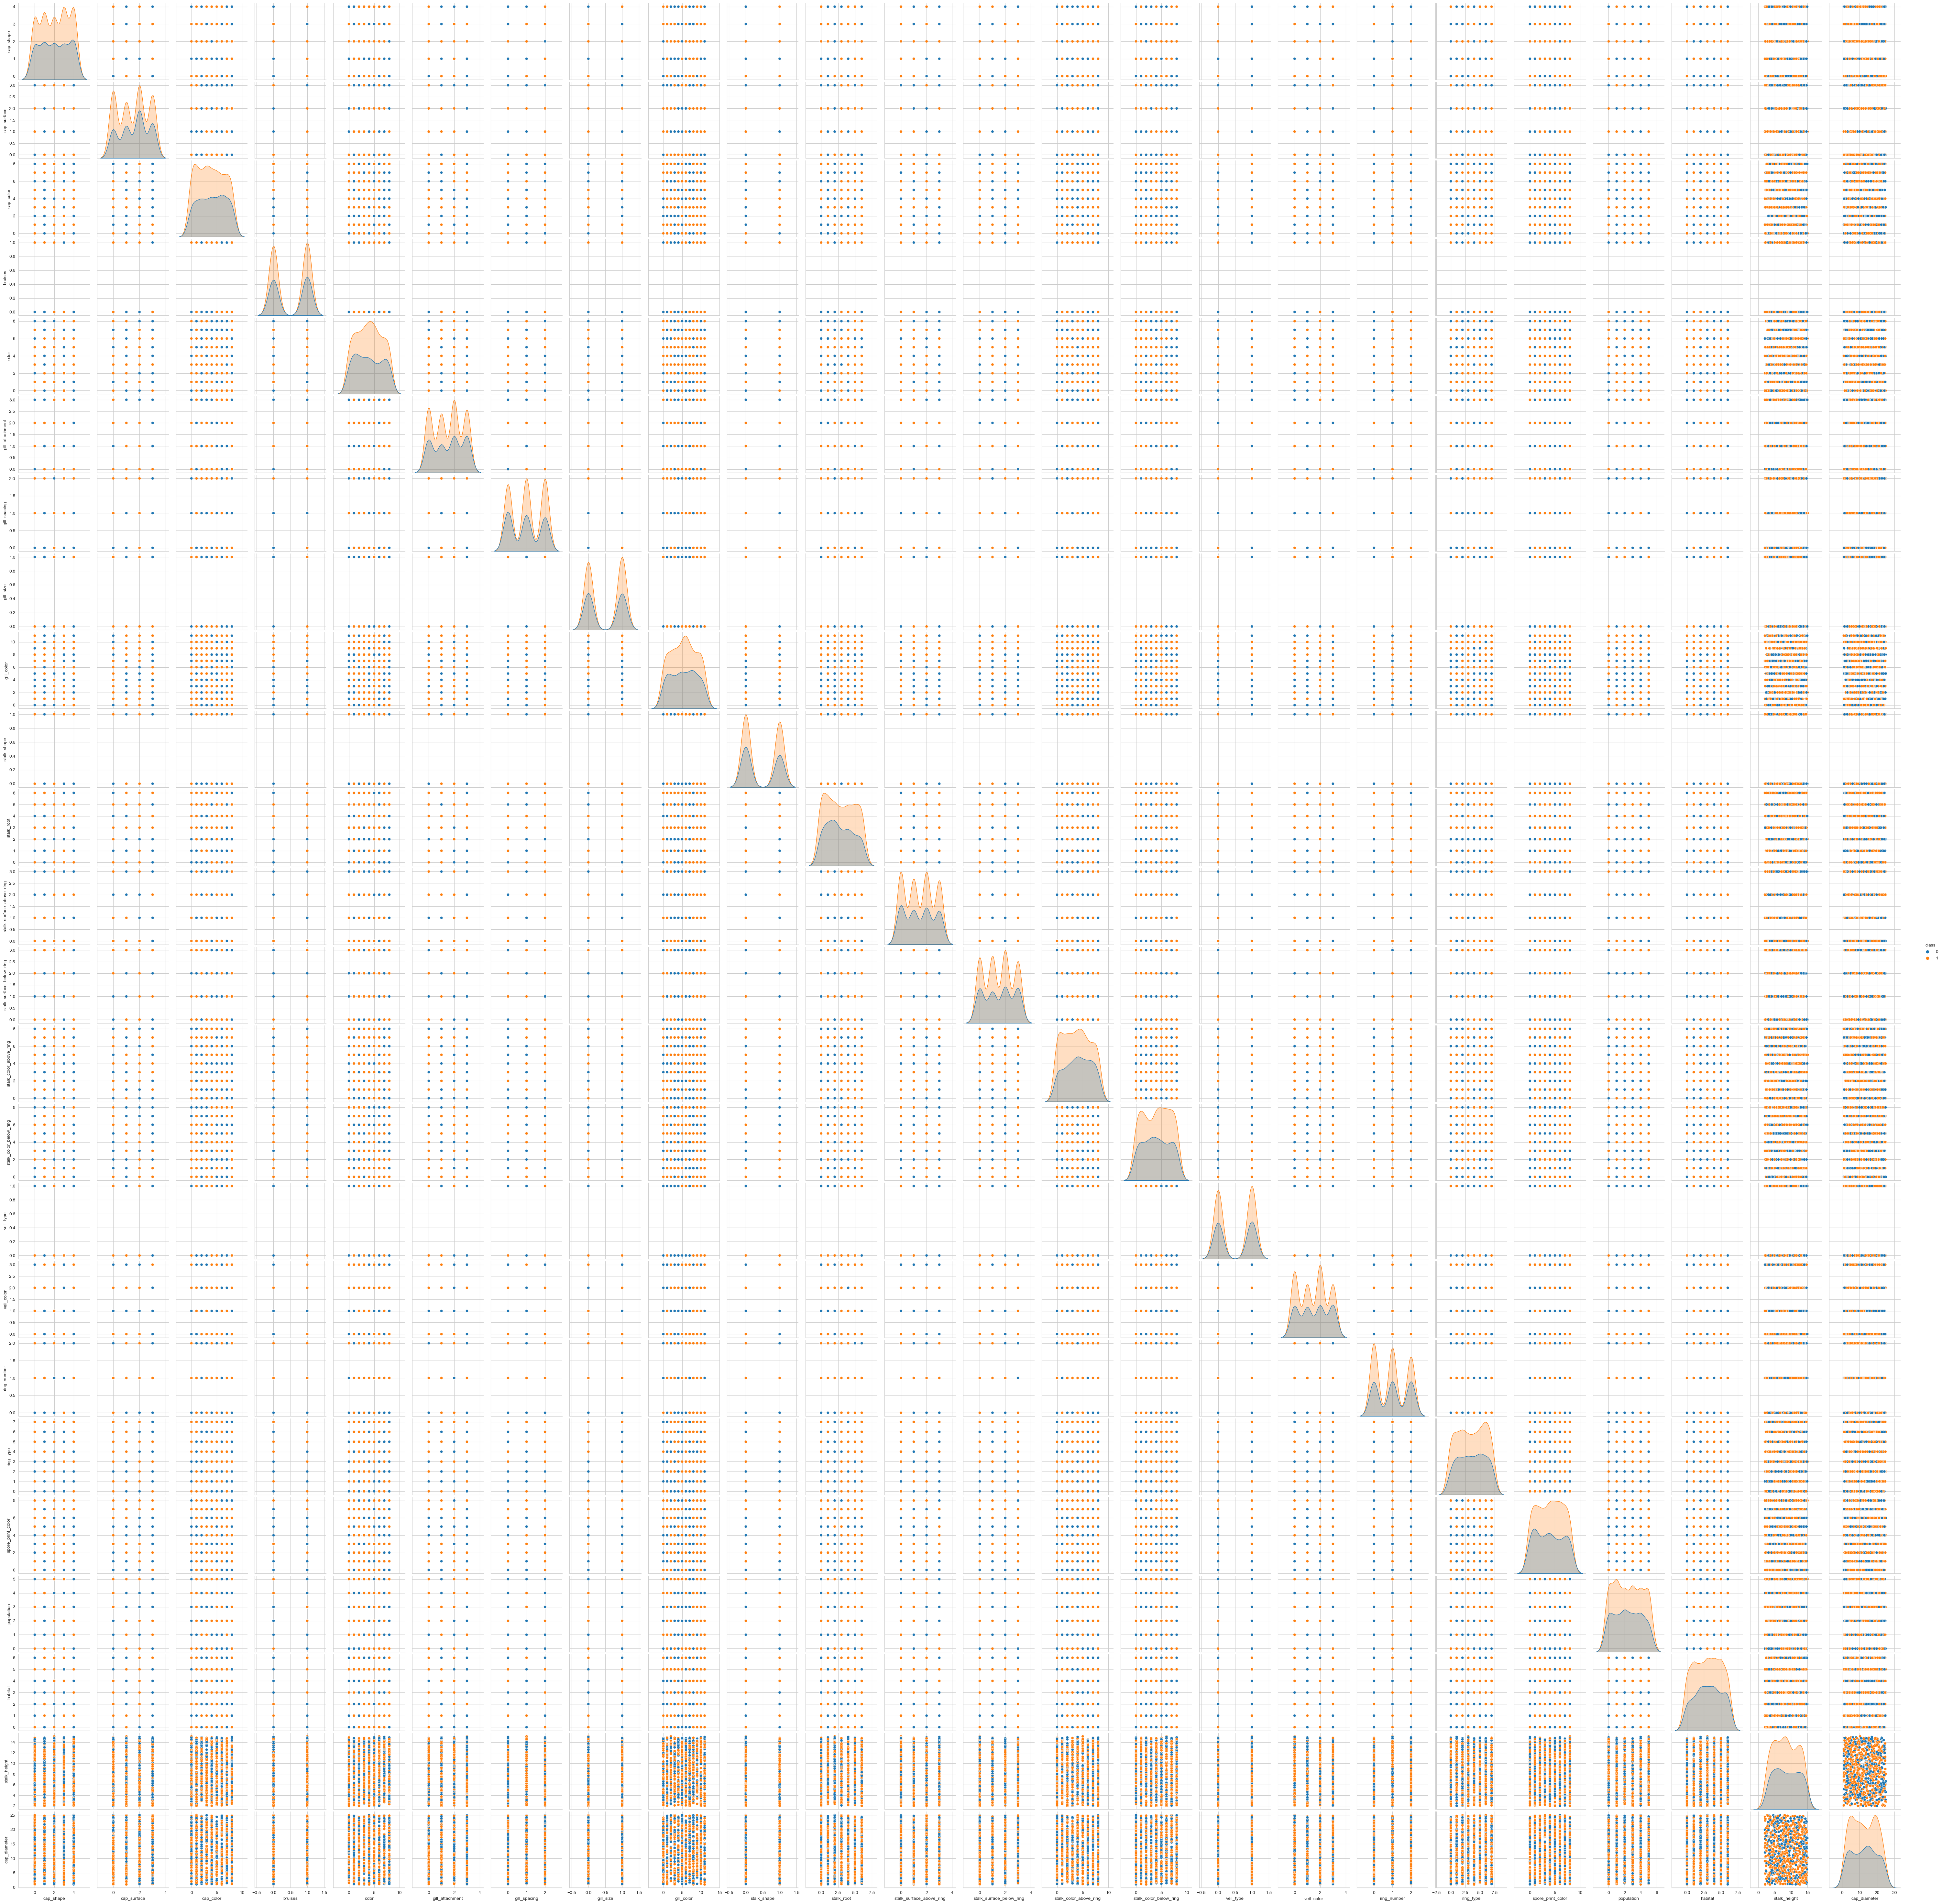

In [57]:
sns.pairplot(data,hue='class')

class
1    618
0    358
Name: count, dtype: int64


Text(0.5, 0.98, 'Class Distribution')

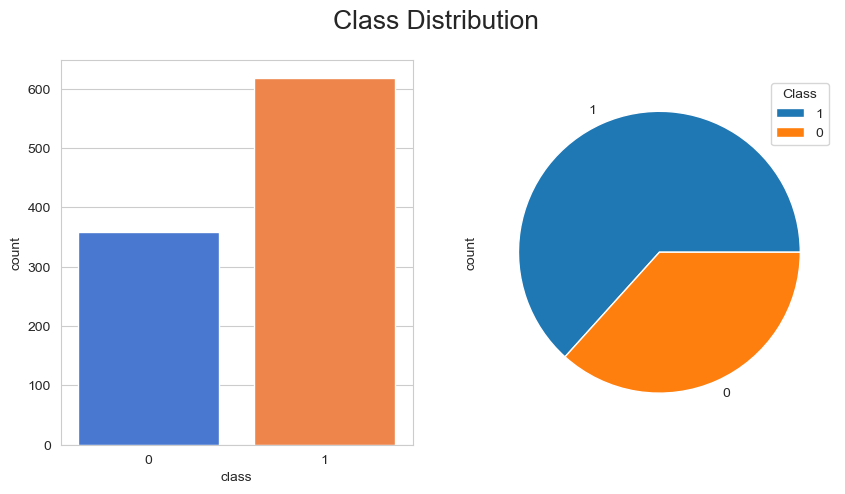

In [58]:
print(data['class'].value_counts())

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=data,x='class',palette = 'muted',saturation=1)

plt.subplot(1,2,2)
data['class'].value_counts().plot(kind = 'pie')
plt.legend(title='Class')

plt.suptitle('Class Distribution',size=19)

From the above figure, we can see that the distribution of the class is imbalanced because the class 1 is twice the number of class 2. Hence we can say that it is imbalanced.

# split data X and Y

In [59]:
X=data.drop('class',axis=1)
X

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0            4            2          7        0     1                1   
1            4            0          6        0     1                3   
2            3            1          5        1     4                1   
3            0            2          4        1     3                3   
4            3            3          8        1     5                2   
..         ...          ...        ...      ...   ...              ...   
971          1            1          0        0     4                3   
972          0            1          4        1     1                1   
973          4            3          5        1     1                1   
974          4            2          5        1     5                0   
975          2            2          8        1     7                1   

     gill_spacing  gill_size  gill_color  stalk_shape  stalk_root  \
0               2          0           7            1           2   
1               1          1           3            0           6   
2               1          0           8            1           2   
3               0          0           6            0           1   
4               1          1           6            0           4   
..            ...        ...         ...          ...         ...   
971             1          0           3            1           2   
972             2          0           1            0           0   
973             1          1           2            1           1   
974             2          1           9            1           5   
975             0          1           8            0           1   

     stalk_surface_above_ring  stalk_surface_below_ring  \
0                           3                         2   
1                           2                         2   
2                           1                         2   
3                           3                         1   
4                           0                         1   
..                        ...                       ...   
971                         3                         2   
972                         1                         0   
973                         1                         2   
974                         0                         0   
975                         0                         1   

     stalk_color_above_ring  stalk_color_below_ring  veil_type  veil_color  \
0                         3                       8          0           0   
1                         2                       0          1           0   
2                         8                       3          1           3   
3                         8                       5          0           3   
4                         3                       7          1           2   
..                      ...                     ...        ...         ...   
971                       6                       8          1           0   
972                       5                       5          0           0   
973                       0                       6          1           1   
974                       5                       4          0           2   
975                       3                       0          0           2   

     ring_number  ring_type  spore_print_color  population  habitat  \
0              2          6                  3           1        5   
1              2          6                  1           2        5   
2              2          6                  6           0        5   
3              2          0                  4           1        0   
4              0          4                  8           1        4   
..           ...        ...                ...         ...      ...   
971            0          3                  1           2        3   
972            2          5                  8           2        0   
97

In [60]:
Y=data["class"]
Y

0      1
1      0
2      1
3      1
4      1
      ..
971    0
972    1
973    0
974    1
975    1
Name: class, Length: 976, dtype: int32

# Split the data into train and test split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=0)

In [63]:
print('Shape of X Train is:',train_x.shape)
print('Shape of X Test is:',test_x.shape)
print('Shape of Y Train is:',train_y.shape)
print('Shape of Y Test is:',test_y.shape)

Shape of X Train is: (780, 24)
Shape of X Test is: (196, 24)
Shape of Y Train is: (780,)
Shape of Y Test is: (196,)


# SVM Implementation

In [64]:
from sklearn.svm import SVC

In [65]:
classifier=SVC()
classifier.fit(train_x,train_y)

SVC()

# predictions

In [66]:
preds = classifier.predict(test_x)

preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

We can see that all the values predicted are class 1. This may be due to the imbalance in the class column.

In [67]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [68]:
accuracy = accuracy_score(test_y,preds)

print('The Accuracy is:',accuracy)

The Accuracy is: 0.5714285714285714


In [69]:
precision = precision_score(test_y,preds)

print('The Precision is:',precision)

The Precision is: 0.5714285714285714


In [70]:
precision = precision_score(test_y,preds)

print('The Precision is:',precision)

The Precision is: 0.5714285714285714


In [71]:
f1score = f1_score(test_y,preds)

print('The F-1 Score is:',f1score )

The F-1 Score is: 0.7272727272727273


In [72]:
print(confusion_matrix(test_y,preds))

[[  0  84]
 [  0 112]]


In [73]:
print(classification_report(test_y,preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.57      1.00      0.73       112

    accuracy                           0.57       196
   macro avg       0.29      0.50      0.36       196
weighted avg       0.33      0.57      0.42       196



C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bavandla dileep\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Parameter Tuning and Optimization

Here in hyperparameter tuning we will build different models using different parameters (ex: kernel type etc.) and use their performance later for comparison 

In [74]:
svm_linear = SVC(kernel='linear')

svm_linear.fit(train_x,train_y)

preds_linear = svm_linear.predict(test_x)
preds_linear

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
accuracy_score(preds_linear,test_y)

0.5714285714285714

# kernel =='poly'

In [76]:
svm_poly = SVC(kernel='poly')

svm_poly.fit(train_x,train_y)

preds_poly = svm_poly.predict(test_x)
preds_poly

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [77]:
accuracy_score(preds_poly,test_y)

0.5714285714285714

# kernel=='sigmoid'

In [78]:
svm_sigmoid = SVC(kernel='sigmoid')

svm_sigmoid.fit(train_x,train_y)

preds_sigmoid = svm_sigmoid.predict(test_x)

accuracy_score(preds_sigmoid,test_y)

0.49489795918367346

# kernel = 'radial basis function (rbf)'

In [79]:
svm_rbf = SVC(kernel='rbf')

svm_rbf.fit(train_x,train_y)

preds_rbf = svm_rbf.predict(test_x)

accuracy_score(preds_rbf,test_y)

0.5714285714285714

We can observe that the kernel type 'sigmoid' is giving lesser accuracy when compared to other kernel types

setting the parameter **class_weight** = **'balanced'** to handle the imbalance in the target column

In [80]:
svm_linear = SVC(kernel='linear',class_weight='balanced')

svm_linear.fit(train_x,train_y)

preds_linear = svm_linear.predict(test_x)

accuracy_score(preds_linear,test_y)

0.5102040816326531

In [81]:
svm_poly = SVC(kernel='poly',class_weight='balanced')

svm_poly.fit(train_x,train_y)

preds_poly = svm_poly.predict(test_x)
accuracy_score(preds_poly,test_y)

0.5867346938775511

In [82]:
svm_sigmoid = SVC(kernel='sigmoid',class_weight='balanced')

svm_sigmoid.fit(train_x,train_y)

preds_sigmoid = svm_sigmoid.predict(test_x)

accuracy_score(preds_sigmoid,test_y)

0.4846938775510204

In [83]:
svm_sigmoid = SVC(kernel='rbf',class_weight='balanced')

svm_sigmoid.fit(train_x,train_y)

preds_sigmoid = svm_sigmoid.predict(test_x)

accuracy_score(preds_sigmoid,test_y)

0.6020408163265306

We can see the increase in performance and the ***kernel = rbf***  is giving more accuracy when compared to other types on the mushroom dataset. So let's use the above parameters and build the model

# Building the model 

In [84]:
model = SVC(C = 1,kernel='rbf',class_weight='balanced',verbose=True,random_state=0)

In [85]:
model.fit(train_x,train_y)

[LibSVM]

SVC(C=1, class_weight='balanced', random_state=0, verbose=True)

# Predictions

In [86]:
test_preds = model.predict(test_x)

test_preds

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [87]:
print('The Accuracy of the model is:',accuracy_score(test_y,test_preds))

The Accuracy of the model is: 0.6020408163265306


In [88]:
print(confusion_matrix(test_y,test_preds))

[[50 34]
 [44 68]]


In [89]:
print(classification_report(test_y,test_preds))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56        84
           1       0.67      0.61      0.64       112

    accuracy                           0.60       196
   macro avg       0.60      0.60      0.60       196
weighted avg       0.61      0.60      0.60       196



### Comparison and Analysis

In [90]:
compare = {
    
'Accuracy':[accuracy_score(preds_linear,test_y),accuracy_score(preds_poly,test_y),
            accuracy_score(preds_sigmoid,test_y),accuracy_score(preds_rbf,test_y)],
    
'Precision':[precision_score(preds_linear,test_y),precision_score(preds_poly,test_y),
             precision_score(preds_sigmoid,test_y),precision_score(preds_rbf,test_y)],
    
'Recall':[recall_score(preds_linear,test_y),recall_score(preds_poly,test_y),
          recall_score(preds_sigmoid,test_y),recall_score(preds_rbf,test_y)],
    
'F1-Score':[f1_score(preds_linear,test_y),f1_score(preds_poly,test_y),
            f1_score(preds_sigmoid,test_y),f1_score(preds_rbf,test_y)],
}

In [91]:
compare_df=pd.DataFrame(compare,index=['linear','poly','sigmoid','rbf'])
compare_df

Accuracy  Precision    Recall  F1-Score
linear   0.510204   0.508929  0.581633  0.542857
poly     0.586735   0.732143  0.616541  0.669388
sigmoid  0.602041   0.607143  0.666667  0.635514
rbf      0.571429   1.000000  0.571429  0.727273

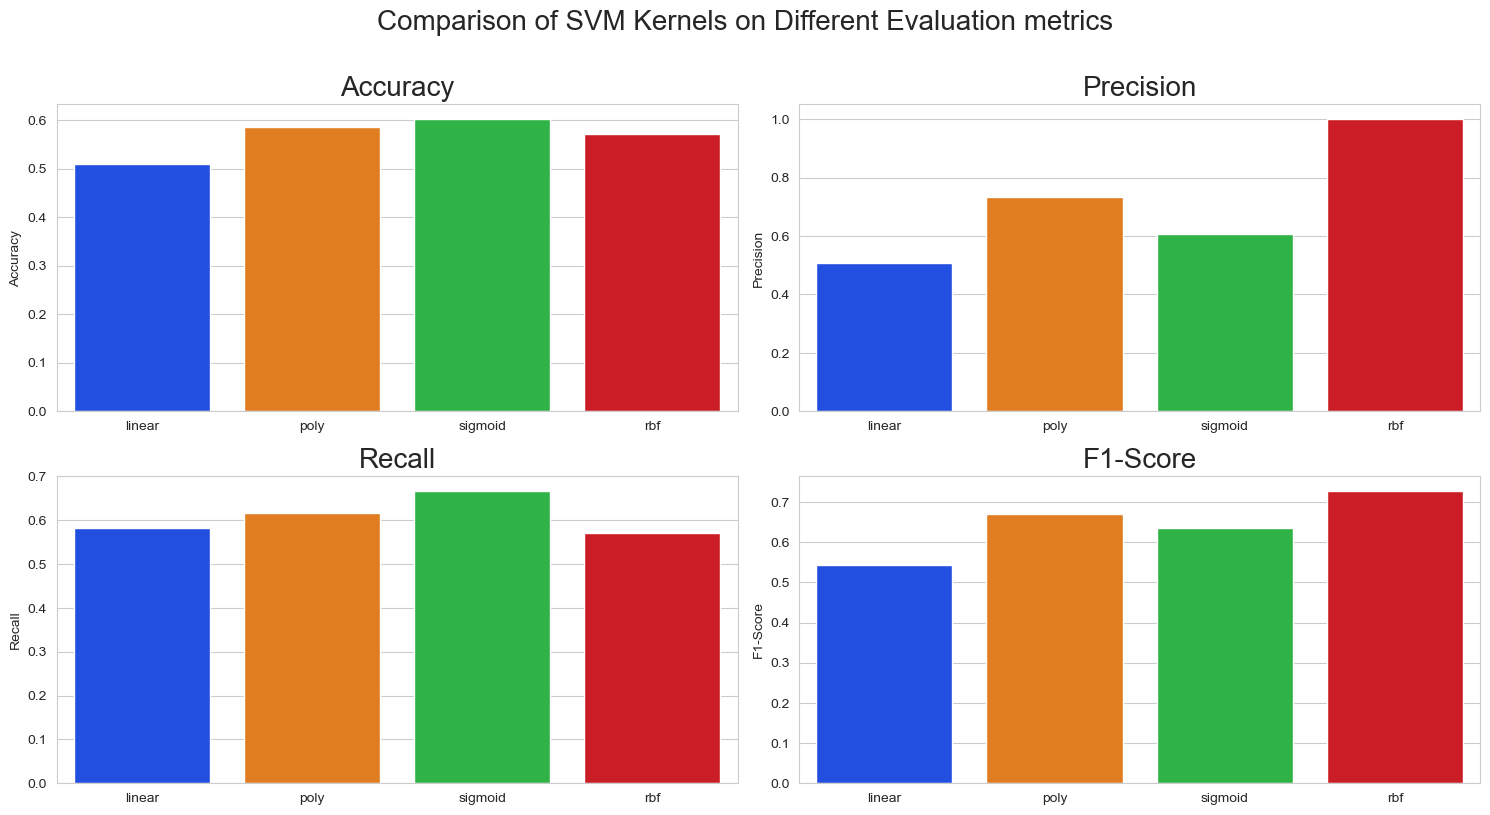

In [92]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot(x=compare_df.index,y='Accuracy',data=compare_df,palette="bright")
plt.title('Accuracy',size=20)

plt.subplot(2,2,2)
sns.barplot(x=compare_df.index,y='Precision',data=compare_df,palette="bright")
plt.title('Precision',size=20)

plt.subplot(2,2,3)
sns.barplot(x=compare_df.index,y='Recall',data=compare_df,palette="bright")
plt.title('Recall',size=20)

plt.subplot(2,2,4)
sns.barplot(x=compare_df.index,y='F1-Score',data=compare_df,palette="bright")
plt.title('F1-Score',size=20)

plt.suptitle('Comparison of SVM Kernels on Different Evaluation metrics',size=20,va='bottom')

plt.tight_layout()

# Grid Search CV

In [93]:
param_grid={
    'kernel':['linear','rbf'],
    'class_weight':['balanced'],
    'gamma':[0.5,0.1,0.01],
    'C':[10,0.1,0.001,0.0001]
}

In [94]:
svc=SVC()

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
gsc=GridSearchCV(estimator=svc,param_grid=param_grid)
gsc.fit(train_x,train_y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 0.1, 0.001, 0.0001],
                         'class_weight': ['balanced'],
                         'gamma': [0.5, 0.1, 0.01],
                         'kernel': ['linear', 'rbf']})

# Best Score

In [97]:
gsc.best_score_

0.6487179487179487

# Best parameters

In [98]:
gsc.best_params_

{'C': 10, 'class_weight': 'balanced', 'gamma': 0.5, 'kernel': 'rbf'}

# Interview Questions

From the above comparison(using comparison dataframe and the above visual we can say that the performance of our SVM model is better for kernel ***radial basis function (rbf)***  followed by ***poly***.

For *rbf* and *poly* all evaluation metrics are good and high enough

Some of the strengths and weaknesses of SVM on our dataset:

**Strengths:**
- Support vector machines can address the issue of imbalance in the target feature.
- Support vector machines can handle the high dimensional data. In our case the data had many features.
- Support vector machines can take care of non linear relationship between different features. It uses different kernels such as poly or rbf etc. to address non-linear relationship.

**Weaknesses:**
- Even though SVM's can handle high dimensions of data but when coming to data with large number of records it can be computationally expensive because support vector machines need more time for training.

In real-world classification tasks, some of the practical implications of SVM include:

Disease detection(classification), Image and object recognition(classifcation), Text Classification, Sentiment analysis, Speech recognition(classification), Price Prediction(svm regression) etc.